In [1]:
from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from tqdm.notebook import tqdm

In [2]:
# %%timeit
# 
# sim = Simulator(num_agents=66, sim_time=60000, lam=1e-4, mean=1e7, r=.05, shock_var=1e6)
# sim.run()

In [3]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=12000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(11392.1230)
CPU times: user 20min 27s, sys: 5min 20s, total: 25min 48s
Wall time: 3min 25s


In [4]:
surpluses

[tensor(363.3098),
 tensor(608.3699),
 tensor(715.7506),
 tensor(319.8185),
 tensor(372.1172),
 tensor(625.2206),
 tensor(395.0910),
 tensor(453.8080),
 tensor(369.9129),
 tensor(467.7806),
 tensor(608.1505),
 tensor(499.7278),
 tensor(356.5397),
 tensor(1004.3756),
 tensor(518.5523),
 tensor(438.6998),
 tensor(311.4074),
 tensor(287.5490),
 tensor(383.7458),
 tensor(328.3387),
 tensor(382.0694),
 tensor(321.0373),
 tensor(611.1390),
 tensor(741.4297),
 tensor(413.8032),
 tensor(566.1379),
 tensor(398.8660),
 tensor(605.4896),
 tensor(723.4001),
 tensor(607.7359),
 tensor(431.4041),
 tensor(676.9710),
 tensor(567.8675),
 tensor(566.6998),
 tensor(333.5826),
 tensor(512.9740),
 tensor(209.9366),
 tensor(462.6917),
 tensor(384.1701),
 tensor(568.3666),
 tensor(451.0240),
 tensor(602.4202),
 tensor(365.1617),
 tensor(189.4688),
 tensor(642.2635),
 tensor(451.2663),
 tensor(376.6481),
 tensor(479.6388),
 tensor(424.7020),
 tensor(345.4447),
 tensor(536.1899),
 tensor(597.8750),
 tensor(483

In [6]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=24000, 
                                  lam=5e-4, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=1e6, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(13776.3555)
CPU times: user 41min 31s, sys: 10min 50s, total: 52min 22s
Wall time: 6min 56s


In [28]:
%%time
surpluses = []

for _ in tqdm(range(10000)):
    sim = SimulatorSampledArrival(num_background_agents=25, 
                                  sim_time=1000, 
                                  lam=5e-3, 
                                  mean=1e5, 
                                  r=0.05, 
                                  shock_var=5e5, 
                                  q_max=10,
                                  pv_var=5e6,
                                  shade=[250,500])
    sim.run()
    fundamental_val = sim.markets[0].get_final_fundamental()
    values = []
    for agent_id in sim.agents:
        agent = sim.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values.append(value)
    surpluses.append(sum(values)/len(values))
print(sum(surpluses)/len(surpluses)*25)

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(10411.2129)
CPU times: user 14min 48s, sys: 962 ms, total: 14min 49s
Wall time: 1min 5s


99386.0859375


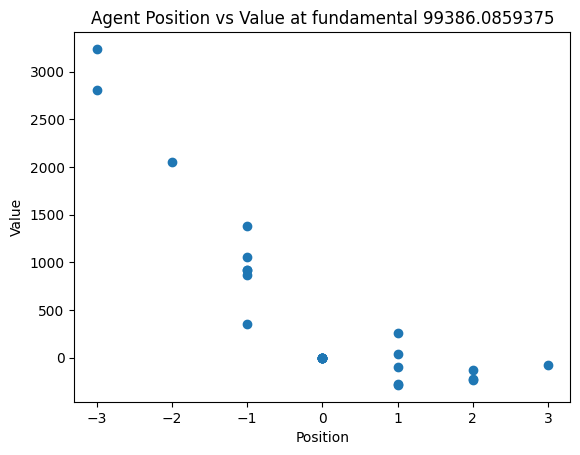

In [7]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


101861.71875


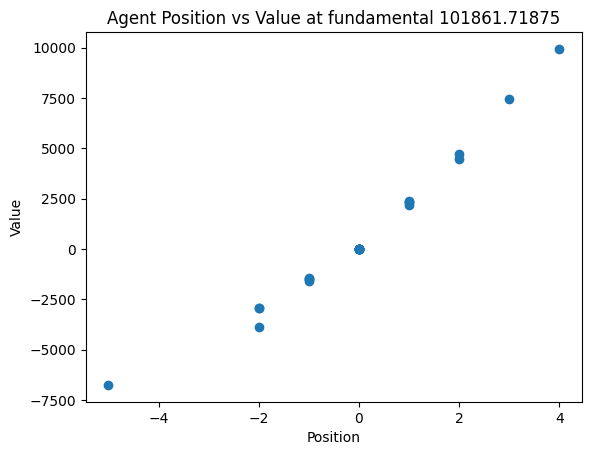

In [8]:
sim = SimulatorSampledArrival(num_background_agents=25, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()


102256.9453125


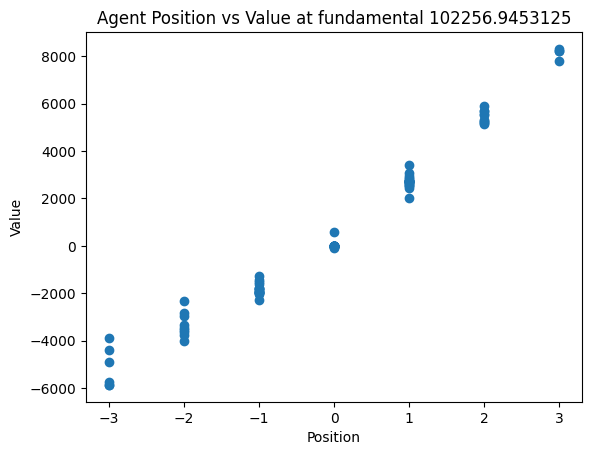

In [9]:
sim = SimulatorSampledArrival(num_background_agents=100, 
                              sim_time=1000, 
                              lam=5e-3, 
                              mean=1e5, 
                              r=0.05, 
                              shock_var=5e5, 
                              q_max=10,
                              pv_var=5e6,
                              shade=[250,500])
sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)


positions = []
values = []
fundamental_val = sim.markets[0].get_final_fundamental()

for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    positions.append(agent.position)
    values.append(value)

import matplotlib.pyplot as plt

print(fundamental_val)
plt.scatter(positions, values)
plt.xlabel('Position')
plt.ylabel('Value')
plt.title(f'Agent Position vs Value at fundamental {fundamental_val}')
plt.show()
